### CONTENTS

- KNN(K Nearest Neighbours)

- KNN
    - k is no of nearest neighbours
    - tries to classify the based on the similarity of the data ponits
    - Recommended systems

- Steps are

    - calculate the distance(Euclidean distance)
    - find the closest neighbours(choose the value of k)
    - vote for labels

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")
df

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  18 non-null     int64 
 1   Weight  18 non-null     int64 
 2   Size    18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [3]:
df.describe()

,Height,Weight
count,18.00000,18.000000
mean,164.00000,62.111111
std,4.32503,2.564208
min,158.00000,58.000000
25%,160.00000,60.250000
50%,164.00000,62.000000
75%,168.00000,63.750000
max,170.00000,68.000000


In [4]:
df.isna().sum()

Height    0
Weight    0
Size      0
dtype: int64

In [6]:
df.shape

(18, 3)

In [7]:
df["Size"].value_counts()

L    11
M     7
Name: Size, dtype: int64

In [12]:
M=df[df["Size"]=="M"]
M

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [13]:
L=df[df["Size"]=="L"]
L

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


In [15]:
g=df.groupby("Size")
g.get_group("M")

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [16]:
g.get_group("L")

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


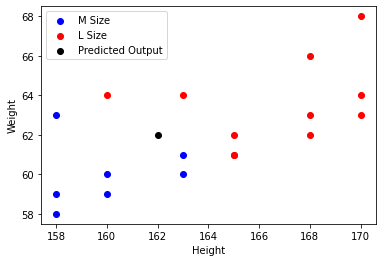

In [35]:
import matplotlib.pyplot as plt
plt.scatter(M["Height"],M["Weight"],c='b',label="M Size")
plt.scatter(L["Height"],L["Weight"],c="r",label="L Size")
plt.scatter(162,62,c="k",label="Predicted Output")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [36]:
x = df.iloc[:,:2]
y = df["target"]

In [37]:
x

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [38]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: target, dtype: int32

In [39]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df["target"]=l.fit_transform(df["Size"])

In [40]:
df

,Height,Weight,Size,target
0,158,58,M,1
1,158,59,M,1
2,158,63,M,1
3,160,59,M,1
4,160,60,M,1
5,163,60,M,1
6,163,61,M,1
7,160,64,L,0
8,163,64,L,0
9,165,61,L,0


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.predict([[164,62]])

array([0])

In [46]:
y_pred=knn.predict(x)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
accuracy_score(y,y_pred)

1.0

In [51]:
confusion_matrix(y,y_pred)

array([[11,  0],
       [ 0,  7]], dtype=int64)

**Precision and Recall**

- Precission = correct values/total predicted values ---> tp/(tp+fp)
- recall = tp/(tp+fn)

In [52]:
precision_score(y,y_pred)

1.0

In [53]:
recall_score(y,y_pred)

1.0

### Heart disease

In [65]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  18 non-null     int64 
 1   Weight  18 non-null     int64 
 2   Size    18 non-null     object
 3   target  18 non-null     int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 632.0+ bytes


In [72]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [73]:
x1 = data.drop("target",axis=1)
y1 = data["target"]

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,train_size=0.3,random_state=65)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=8)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [135]:
l = []
for i in range(1,20):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    y_pred = knn1.predict(x_test)
    l.append(accuracy_score(y_test,y_pred)*100)
    

In [136]:
l

[59.154929577464785,
 59.154929577464785,
 62.441314553990615,
 63.84976525821596,
 62.91079812206573,
 60.56338028169014,
 64.31924882629107,
 63.84976525821596,
 65.25821596244131,
 62.441314553990615,
 67.13615023474179,
 64.31924882629107,
 65.25821596244131,
 63.38028169014085,
 64.7887323943662,
 60.093896713615024,
 64.7887323943662,
 61.97183098591549,
 66.19718309859155]

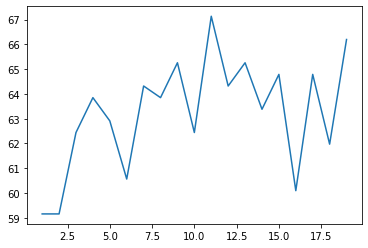

In [137]:
import numpy as np
x=np.arange(1,20)
plt.plot(x,l)

In [138]:
y_pred = knn1.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
accuracy_score(y_test,y_pred)*100

66.19718309859155

In [140]:
confusion_matrix(y_test,y_pred)

array([[60, 33],
       [39, 81]], dtype=int64)

In [141]:
precision_score(y_test,y_pred)

0.7105263157894737

In [142]:
recall_score(y_test,y_pred)

0.675

- Actual values
    - patients have heart disease --> 60
    - Patients don't have heart disease -->81
- Predicted values
    - patients have heart disease
    - patients don't have heart disease